In [12]:
from c3s_511_trends import TrendLims1D

# Example A: Reading in station data, resampling and plotting


Loaded datafile ./test_data/ehdb_t2m.nc


/net/exo/landclim/crezees/conda/envs/esmval2/lib/python3.6/site-packages/iris/fileformats/cf.py:1143: IrisDeprecation: NetCDF default loading behaviour currently does not expose variables which define reference surfaces for dimensionless vertical coordinates as independent Cubes. This behaviour is deprecated in favour of automatic promotion to Cubes. To switch to the new behaviour, set iris.FUTURE.netcdf_promote to True.
  warn_deprecated(msg)
/net/exo/landclim/crezees/conda/envs/esmval2/lib/python3.6/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1813: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  if np.issubdtype(cf_var.dtype, np.str):
/net/exo/landclim/crezees/conda/envs/esmval2/lib/python3.6/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1813: FutureWarning: Conversion of the second argument of issubdtype from 

Resampled to Y frequency
Creating a plot with label: T2m


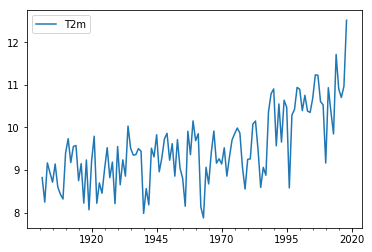

In [13]:
mydat = TrendLims1D('De Bilt T2m')
mydat.load_file('./test_data/ehdb_t2m.nc')
mydat.resample('Y')
mydat.plot('T2m')

# Example B: Creating artificial data and breakpoint detection

Created an artificial timeseries
Calculated Mann-Kendall test
Calculated linear trend test
Calculated Theil-Sen slope
Resampled to Y frequency
Creating a plot with label: Test data
This timeseries is marked as Suspect (value based)


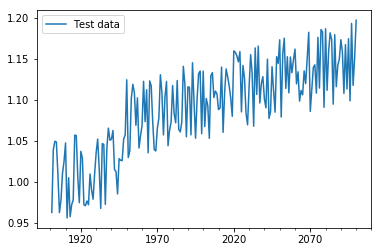

In [26]:
mydat = TrendLims1D('artificial_timeseries')
mydat.create_artificial({'periods' : 200, 'jump_start' : 46, 'jump_length': 200,'jump_magnitude' : 0.05, 'trend_magnitude' : 0.005})
mydat.do_trends()
mydat.resample('Y') # Resample to yearly resolution
mydat.plot(label='Test data')
mydat.breakpoint_recipe_values()

# Example C: How breakpoint detection is affected by removal of the linear trend

In [15]:
mydat = TrendLims1D('artificial_timeseries')
print("Creating test data with no jump")
noise_magnitude = 0.05
mydat.create_artificial({'periods' : 200, 'jump_start' : 46, 'jump_length': 200,'jump_magnitude' : 0.0*noise_magnitude, 'trend_magnitude' : 0.1*noise_magnitude, 'noise' : noise_magnitude})
mydat.breakpoint_recipe_values()
print("Now removing the trend through subtracting the linear trend.")
mydat.do_trends()
mydat.remove_trend('trend_linear')
mydat.breakpoint_recipe_values()

Creating test data with no jump
Created an artificial timeseries
This timeseries is marked as Suspect (value based)
Now removing the trend through subtracting the linear trend.
Calculated Mann-Kendall test
Calculated linear trend test
Calculated Theil-Sen slope
This timeseries is marked as Useful (value based)


# Example D:  Breakpoint detection on difference values ("variance")

Loaded datafile ./test_data/ehdb_t2m.nc


/net/exo/landclim/crezees/conda/envs/esmval2/lib/python3.6/site-packages/iris/fileformats/cf.py:1143: IrisDeprecation: NetCDF default loading behaviour currently does not expose variables which define reference surfaces for dimensionless vertical coordinates as independent Cubes. This behaviour is deprecated in favour of automatic promotion to Cubes. To switch to the new behaviour, set iris.FUTURE.netcdf_promote to True.
  warn_deprecated(msg)
/net/exo/landclim/crezees/conda/envs/esmval2/lib/python3.6/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1813: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  if np.issubdtype(cf_var.dtype, np.str):
/net/exo/landclim/crezees/conda/envs/esmval2/lib/python3.6/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1813: FutureWarning: Conversion of the second argument of issubdtype from 

Subsetted to timeperiod 1950-01-01-2017-12-31
This timeseries is marked as Useful (variance based)
Creating a plot with label: None


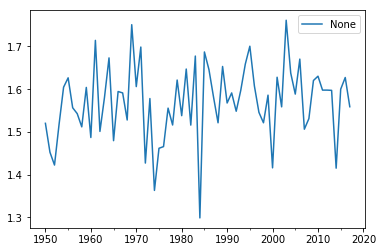

In [24]:
mydat = TrendLims1D('De Bilt T2m')
mydat.load_file('./test_data/ehdb_t2m.nc')
# Detect breakpoints
mydat.subset(slice('1950-01-01','2017-12-31'))
mydat.breakpoint_recipe_differences()
mydat.plot(mode='differences')
#mydat.plot_breakpoints()

## Example E: Analyse the residuals after subtracting a certain trend

Resampled to Y frequency
Calculated Mann-Kendall test
Calculated linear trend test
Calculated Theil-Sen slope


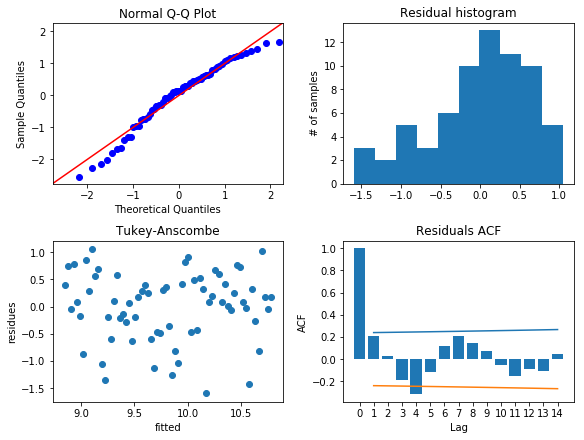

In [25]:
mydat.resample('Y')
mydat.do_trends()
mydat.do_residual_analysis('trend_linear')
pass # dummy statement for preventing image showing up twice